In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
with open("OLtest_raw_data_160.txt", "r") as file:
    raw_data = file.read().strip().split("ModeConstantDC")[1:-1]

ndata = len(raw_data)
columns = list(map(lambda x: (x.split(" = ")[0]), raw_data[0].strip().split("\n")))

data_np = np.zeros((len(columns), ndata))
for i in range(ndata):
    data_np[:,i] = list(map(lambda x: float(x.split(" = ")[-1]), raw_data[i].strip().split("\n")))

data = pd.DataFrame(data_np.T, columns=columns)
data.insert(0,"time",np.cumsum(data["dt"]),False)
print(str(data.columns))

Index(['time', 'dt', 'xpos', 'ypos', 'thetapos', 'vfwd', 'omega', 'speed_left',
       'speed_right', 'dc left', 'dc right'],
      dtype='object')


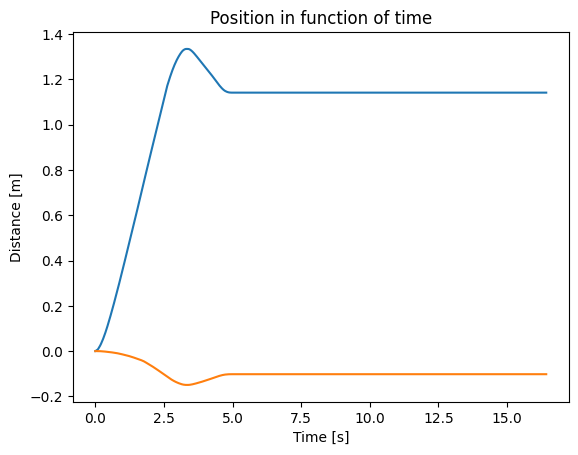

In [40]:
plt.title("Position in function of time")
plt.plot(data["time"], data["xpos"], label="x")
plt.plot(data["time"], data["ypos"], label="y")
plt.xlabel("Time [s]")
plt.ylabel("Distance [m]")
plt.show()

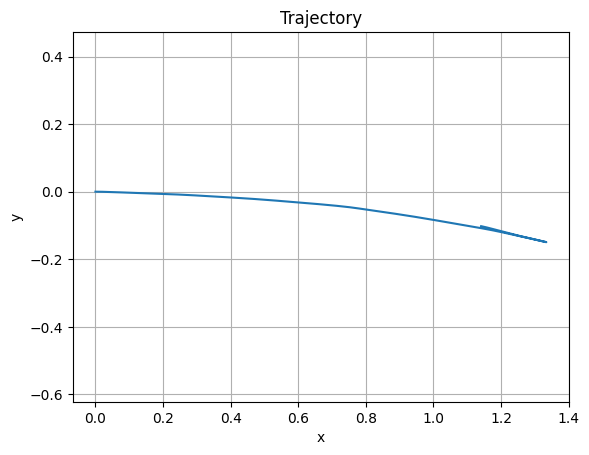

In [41]:
plt.title("Trajectory")
plt.plot(data["xpos"], data["ypos"])
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid()
plt.show()

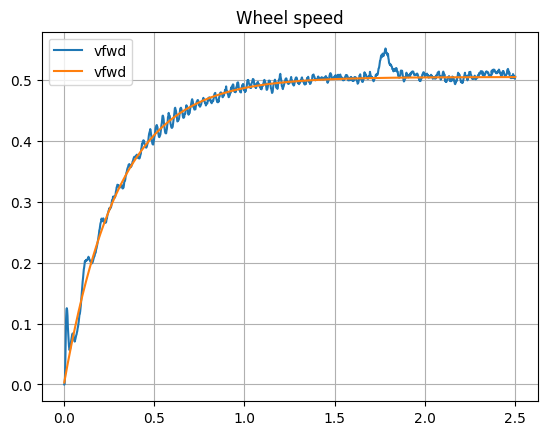

In [52]:
u = 160/240
A = 0.505/u
tau = 0.3
step_response_estimation = u*A*(1-np.exp(-data["time"]/tau)) 
plt.figure()
plt.title("Wheel speed")
mask = data["time"] <= 2.5
plt.plot(data["time"][mask], data["vfwd"][mask], label="vfwd")
plt.plot(data["time"][mask], step_response_estimation[mask], label="vfwd")
# plt.plot(data)
plt.legend()
plt.grid()
plt.show()

In [54]:
print(A)
print(tau)
# Voir fichier matlab

0.7575000000000001
0.3


In [58]:
A = 0.7575000000000001;
tau = 0.3;

# Pole placement
tau1 = tau
tau2 = tau/10
Ki1 = tau/(tau1*tau2*A)
Kp1 = (1/A)*(A*Ki1*(tau1+tau2)-1)


# 1 pole placement + PZ cancellation
tau2 = tau2
Ki2 = 1/(A*tau2)
Kp2 = tau/(A*tau2)

print("Pole placement\n-------------------")
print(f"Ki = {Ki1:.4f}\nKp = {Kp1:.4f}\n")
print("PZ cancellation\n-------------------")
print(f"Ki = {Ki2:.4f}\nKp = {Kp2:.4f}\n")


Pole placement
-------------------
Ki = 44.0044
Kp = 13.2013

PZ cancellation
-------------------
Ki = 44.0044
Kp = 13.2013

